#의생명정보학 프로젝트

201801306 남상우
201804594 손무현
201803102 임혜원 


In [2]:
import pandas as pd
import os.path
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Bioinformatics/Project_Data_Bioinformatics'
path_list = sorted(glob.glob(os.path.join(path,'gnomAD*')),key=os.path.getctime)
#sorted(glob.glob('*'), key=os.path.getmtime)key=os.path.getctime

In [5]:
path_list

['/content/drive/MyDrive/Bioinformatics/Project_Data_Bioinformatics/gnomAD_v2.1.1_ENSG00000064012_2021_12_09_19_07_10_CASP8.csv',
 '/content/drive/MyDrive/Bioinformatics/Project_Data_Bioinformatics/gnomAD_v2.1.1_ENSG00000105647_2021_12_09_19_08_56_PIK3CA.csv',
 '/content/drive/MyDrive/Bioinformatics/Project_Data_Bioinformatics/gnomAD_v2.1.1_ENSG00000107968_2021_12_09_19_12_12_MAP3K8.csv',
 '/content/drive/MyDrive/Bioinformatics/Project_Data_Bioinformatics/gnomAD_v2.1.1_ENSG00000117560_2021_12_09_19_06_47_FASLG.csv',
 '/content/drive/MyDrive/Bioinformatics/Project_Data_Bioinformatics/gnomAD_v2.1.1_ENSG00000125347_2021_12_09_19_09_40_IRF1.csv',
 '/content/drive/MyDrive/Bioinformatics/Project_Data_Bioinformatics/gnomAD_v2.1.1_ENSG00000137713_2021_12_09_19_14_22_PPP2R1B.csv',
 '/content/drive/MyDrive/Bioinformatics/Project_Data_Bioinformatics/gnomAD_v2.1.1_ENSG00000133703_2021_12_09_19_14_55_KRAS.csv',
 '/content/drive/MyDrive/Bioinformatics/Project_Data_Bioinformatics/gnomAD_v2.1.1_ENSG00

In [6]:
CASP8 = pd.read_csv(path_list[0],header=None)
#PIK3CA = pd.read_csv(path_list[1],header=None)
#MAP3K8 = pd.read_csv(path_list[2],header=None)
#FASLG = pd.read_csv(path_list[3],header=None)
#IRF1= pd.read_csv(path_list[4],header=None)
#PPP2R1B = pd.read_csv(path_list[5],header=None)
#KRAS = pd.read_csv(path_list[6],header=None)
#ERBB2 = pd.read_csv(path_list[7],header=None)
#EGFR = pd.read_csv(path_list[8],header=None)
#BRAF = pd.read_csv(path_list[9],header=None)
#CYP2A6 = pd.read_csv(path_list[10],header=None)
#PRKN = pd.read_csv(path_list[11],header=None)
#ERCC6 = pd.read_csv(path_list[12],header=None)

In [7]:
CASP8 = CASP8.rename(columns=CASP8.iloc[0]) # 첫번째 행을 column으로 지정
CASP8 = CASP8.drop(index=0, axis=0) # index가 0인 행만 삭제

In [8]:
print(CASP8.columns)

Index(['Chromosome', 'Position', 'rsIDs', 'Reference', 'Alternate', 'Source',
       'Filters - exomes', 'Filters - genomes', 'Transcript',
       'HGVS Consequence', 'Protein Consequence', 'Transcript Consequence',
       'VEP Annotation', 'ClinVar Clinical Significance',
       'ClinVar Variation ID', 'Flags', 'Allele Count', 'Allele Number',
       'Allele Frequency', 'Homozygote Count', 'Hemizygote Count',
       'Allele Count African/African American',
       'Allele Number African/African American',
       'Homozygote Count African/African American',
       'Hemizygote Count African/African American',
       'Allele Count Latino/Admixed American',
       'Allele Number Latino/Admixed American',
       'Homozygote Count Latino/Admixed American',
       'Hemizygote Count Latino/Admixed American',
       'Allele Count Ashkenazi Jewish', 'Allele Number Ashkenazi Jewish',
       'Homozygote Count Ashkenazi Jewish',
       'Hemizygote Count Ashkenazi Jewish', 'Allele Count East Asian',

전체 synonymous variant와 non_synonymous variant의 비율
인종별 synonymous variant는 분포는 어떤지



In [9]:
print(CASP8.shape)

(759, 53)


In [11]:
num_samples = CASP8.shape[0]  #전체 샘플 수
print(num_samples)

759


In [ ]:
CASP8.head(10)

,Chromosome,Position,rsIDs,Reference,Alternate,Source,Filters - exomes,Filters - genomes,Transcript,HGVS Consequence,Protein Consequence,Transcript Consequence,VEP Annotation,ClinVar Clinical Significance,ClinVar Variation ID,Flags,Allele Count,Allele Number,Allele Frequency,Homozygote Count,Hemizygote Count,Allele Count African/African American,Allele Number African/African American,Homozygote Count African/African American,Hemizygote Count African/African American,Allele Count Latino/Admixed American,Allele Number Latino/Admixed American,Homozygote Count Latino/Admixed American,Hemizygote Count Latino/Admixed American,Allele Count Ashkenazi Jewish,Allele Number Ashkenazi Jewish,Homozygote Count Ashkenazi Jewish,Hemizygote Count Ashkenazi Jewish,Allele Count East Asian,Allele Number East Asian,Homozygote Count East Asian,Hemizygote Count East Asian,Allele Count European (Finnish),Allele Number European (Finnish),Homozygote Count European (Finnish),Hemizygote Count European (Finnish),Allele Count European (non-Finnish),Allele Number European (non-Finnish),Homozygote Count European (non-Finnish),Hemizygote Count European (non-Finnish),Allele Count Other,Allele Number Other,Homozygote Count Other,Hemizygote Count Other,Allele Count South Asian,Allele Number South Asian,Homozygote Count South Asian,Hemizygote Count South Asian
1,2,202122901,rs920664391,G,GT,gnomAD Genomes,NaN,PASS,ENST00000358485.4,c.-46dupT,NaN,c.-46dupT,5_prime_UTR_variant,NaN,NaN,NaN,6,31170,0.00019249278152069297,0,0,1,8656,0,0,0,846,0,0,0,288,0,0,0,1554,0,0,2,3452,0,0,3,15292,0,0,0,1082,0,0,0,0,0,0
2,2,202122909,rs1207061101,T,G,gnomAD Exomes,PASS,NaN,ENST00000358485.4,c.-46T>G,NaN,c.-46T>G,5_prime_UTR_variant,NaN,NaN,NaN,1,248908,0.000004017548652514182,0,0,0,15464,0,0,0,34368,0,0,0,10052,0,0,0,17952,0,0,0,21528,0,0,1,112904,0,0,0,6048,0,0,0,30592,0,0
3,2,202122910,rs745946856,C,G,gnomAD Exomes,PASS,NaN,ENST00000358485.4,c.-45C>G,NaN,c.-45C>G,5_prime_UTR_variant,NaN,NaN,NaN,3,248546,0.000012070200284856726,0,0,0,15436,0,0,0,34258,0,0,0,10004,0,0,0,17836,0,0,0,21534,0,0,0,112924,0,0,1,6026,0,0,2,30528,0,0
4,2,202122913,rs1488428251,G,T,gnomAD Exomes,PASS,NaN,ENST00000358485.4,c.-42G>T,NaN,c.-42G>T,5_prime_UTR_variant,NaN,NaN,NaN,1,248940,0.000004017032216598377,0,0,0,15468,0,0,0,34364,0,0,0,10058,0,0,0,17940,0,0,0,21538,0,0,1,112962,0,0,0,6036,0,0,0,30574,0,0
5,2,202122918,rs909217251,G,C,gnomAD Genomes,NaN,PASS,ENST00000358485.4,c.-37G>C,NaN,c.-37G>C,5_prime_UTR_variant,NaN,NaN,NaN,1,31216,0.00003203485392106612,0,0,0,8654,0,0,0,846,0,0,0,290,0,0,0,1560,0,0,0,3458,0,0,0,15322,0,0,1,1086,0,0,0,0,0,0
6,2,202122919,rs770297076,C,A,gnomAD Exomes,PASS,NaN,ENST00000358485.4,c.-36C>A,NaN,c.-36C>A,5_prime_UTR_variant,NaN,NaN,NaN,10,249160,0.00004013485310643763,0,0,1,15476,0,0,0,34414,0,0,0,10068,0,0,0,17976,0,0,0,21550,0,0,8,113032,0,0,1,6048,0,0,0,30596,0,0
7,2,202122926,rs375965679,T,C,"gnomAD Exomes,gnomAD Genomes",PASS,PASS,ENST00000358485.4,c.-29T>C,NaN,c.-29T>C,5_prime_UTR_variant,NaN,NaN,NaN,181,280580,0.0006450923087889372,0,0,161,24166,0,0,19,35280,0,0,0,10360,0,0,0,19538,0,0,0,25016,0,0,0,128484,0,0,1,7136,0,0,0,30600,0,0
8,2,202122929,rs749860235,T,A,gnomAD Exomes,PASS,NaN,ENST00000358485.4,c.-26T>A,NaN,c.-26T>A,5_prime_UTR_variant,NaN,NaN,NaN,1,249302,0.000004011199268357253,0,0,0,15480,0,0,0,34454,0,0,1,10072,0,0,0,17978,0,0,0,21556,0,0,0,113112,0,0,0,6050,0,0,0,30600,0,0
9,2,202122930,rs1199532668,A,G,gnomAD Exomes,PASS,NaN,ENST00000358485.4,c.-25A>G,NaN,c.-25A>G,5_prime_UTR_variant,NaN,NaN,NaN,1,249230,0.0000040123580628335275,0,0,0,15480,0,0,1,34418,0,0,0,10070,0,0,0,17978,0,0,0,21554,0,0,0,113078,0,0,0,6052,0,0,0,30600,0,0
10,2,202122932,rs768874099,T,C,gnomAD Exomes,PASS,NaN,ENST00000358485.4,c.-23T>C,NaN,c.-23T>C,5_prime_UTR_variant,NaN,NaN,NaN,2,249228,0.000008024780522252716,0,0,0,15480,0,0,2,34418,0,0,0,10068,0,0,0,17978,0,0,0,21552,0,0,0,113082,0,0,0,6050,0,0,0,30600,0,0


In [12]:
# continent 컬럼을 선택합니다.
# 컬럼의 값과 조건을 비교합니다.
# 그 결과를 새로운 변수에 할당합니다.

# condition1 : single nucleotide on Reference
# condition2 : single nucleotide on Alternate
condition1 = (CASP8['Reference'] == 'A') | (CASP8['Reference'] == 'C') | (CASP8['Reference'] == 'G') | (CASP8['Reference'] == 'T')
condition2 = (CASP8['Alternate'] == 'A') | (CASP8['Alternate'] == 'C') | (CASP8['Alternate'] == 'G') | (CASP8['Alternate'] == 'T')

# 조건를 충족하지 않는 데이터를 필터링하여 새로운 변수에 저장합니다.
#subset_CASP8_S = CASP8[~CASP8_S]

# 결과를 출력
CASP8[condition1 & condition2]
#조건을 충족하지 않는 데이터
CASP8[~(condition1 & condition2)]

,Chromosome,Position,rsIDs,Reference,Alternate,Source,Filters - exomes,Filters - genomes,Transcript,HGVS Consequence,Protein Consequence,Transcript Consequence,VEP Annotation,ClinVar Clinical Significance,ClinVar Variation ID,Flags,Allele Count,Allele Number,Allele Frequency,Homozygote Count,Hemizygote Count,Allele Count African/African American,Allele Number African/African American,Homozygote Count African/African American,Hemizygote Count African/African American,Allele Count Latino/Admixed American,Allele Number Latino/Admixed American,Homozygote Count Latino/Admixed American,Hemizygote Count Latino/Admixed American,Allele Count Ashkenazi Jewish,Allele Number Ashkenazi Jewish,Homozygote Count Ashkenazi Jewish,Hemizygote Count Ashkenazi Jewish,Allele Count East Asian,Allele Number East Asian,Homozygote Count East Asian,Hemizygote Count East Asian,Allele Count European (Finnish),Allele Number European (Finnish),Homozygote Count European (Finnish),Hemizygote Count European (Finnish),Allele Count European (non-Finnish),Allele Number European (non-Finnish),Homozygote Count European (non-Finnish),Hemizygote Count European (non-Finnish),Allele Count Other,Allele Number Other,Homozygote Count Other,Hemizygote Count Other,Allele Count South Asian,Allele Number South Asian,Homozygote Count South Asian,Hemizygote Count South Asian
1,2,202122901,rs920664391,G,GT,gnomAD Genomes,NaN,PASS,ENST00000358485.4,c.-46dupT,NaN,c.-46dupT,5_prime_UTR_variant,NaN,NaN,NaN,6,31170,0.00019249278152069297,0,0,1,8656,0,0,0,846,0,0,0,288,0,0,0,1554,0,0,2,3452,0,0,3,15292,0,0,0,1082,0,0,0,0,0,0
30,2,202122999,rs777586802,A,AAACTTCTTCCT,"gnomAD Exomes,gnomAD Genomes",PASS,PASS,ENST00000358485.4,p.Gly20ThrfsTer18,p.Gly20ThrfsTer18,c.46_56dupAACTTCTTCCT,frameshift_variant,NaN,NaN,lof_flag,40,280870,0.00014241464022501514,0,0,0,24182,0,0,0,35376,0,0,0,10358,0,0,40,19536,0,0,0,25034,0,0,0,128634,0,0,0,7148,0,0,0,30602,0,0
51,2,202123069,rs749203863,T,TC,gnomAD Exomes,PASS,NaN,ENST00000358485.4,p.Glu40GlyfsTer19,p.Glu40GlyfsTer19,c.116dupC,frameshift_variant,NaN,NaN,lof_flag,1,247958,0.0000040329410625993114,0,0,0,15486,0,0,0,34528,0,0,0,10066,0,0,0,17978,0,0,0,21562,0,0,0,111678,0,0,0,6058,0,0,1,30602,0,0
52,2,202123069,rs749203863,TCGGAG,T,gnomAD Exomes,PASS,NaN,ENST00000358485.4,p.Ser39TyrfsTer18,p.Ser39TyrfsTer18,c.116_120delCGGAG,frameshift_variant,NaN,NaN,lof_flag,1,247958,0.0000040329410625993114,0,0,0,15486,0,0,0,34528,0,0,0,10066,0,0,0,17978,0,0,0,21562,0,0,1,111678,0,0,0,6058,0,0,0,30602,0,0
54,2,202123070,rs767472565,CG,C,gnomAD Genomes,NaN,PASS,ENST00000358485.4,p.Glu40ArgfsTer45,p.Glu40ArgfsTer45,c.118delG,frameshift_variant,NaN,NaN,lof_flag,2,31386,0.00006372267890142101,0,0,0,8704,0,0,0,848,0,0,0,290,0,0,0,1558,0,0,0,3476,0,0,2,15422,0,0,0,1088,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,2,202151330,rs560696634,G,GTTTGT,"gnomAD Exomes,gnomAD Genomes",PASS,PASS,ENST00000358485.4,c.*32_*36dupGTTTT,NaN,c.*32_*36dupGTTTT,3_prime_UTR_variant,NaN,NaN,lcr,221,278838,0.0007925749001212174,0,0,182,24642,0,0,4,34818,0,0,2,10302,0,0,6,19680,0,0,0,25008,0,0,9,126916,0,0,0,7136,0,0,18,30336,0,0
743,2,202151332,rs781091249,TTG,T,gnomAD Exomes,PASS,NaN,ENST00000358485.4,c.*17_*18delGT,NaN,c.*17_*18delGT,3_prime_UTR_variant,NaN,NaN,lcr,1,242922,0.0000041165476984381815,0,0,0,15494,0,0,0,34292,0,0,0,9936,0,0,0,17668,0,0,0,21396,0,0,1,108262,0,0,0,5972,0,0,0,29902,0,0
748,2,202151349,rs748265805,G,GT,"gnomAD Exomes,gnomAD Genomes",PASS,PASS,ENST00000358485.4,c.*39dupT,NaN,c.*39dupT,3_prime_UTR_variant,NaN,NaN,lcr,4,268040,0.000014923145799134458,0,0,2,23696,0,0,1,34674,0,0,0,10154,0,0,0,18640,0,0,0,24482,0,0,0,120082,0,0,0,6948,0,0,1,29364,0,0
749,2,202151349,rs748265805,GT,G,"gnomAD Exomes,gnomAD Genomes",PASS,PASS,ENST00000358485.4,c.*39delT,NaN,c.*39delT,3_prime_UTR_variant,N

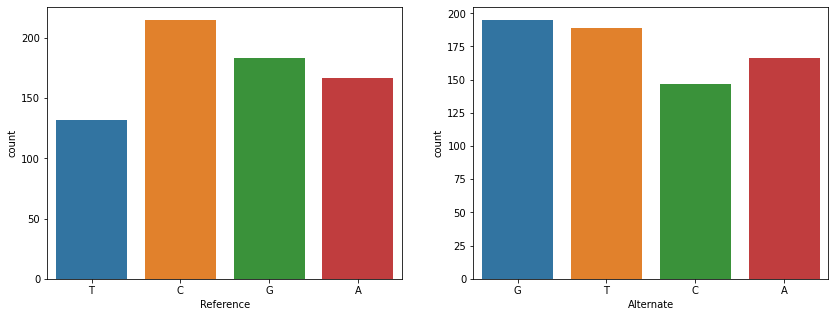

In [13]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(14,5)

sns.countplot(data=CASP8[condition1 & condition2], x="Reference", ax=ax1)
sns.countplot(data=CASP8[condition1 & condition2], x="Alternate", ax=ax2)

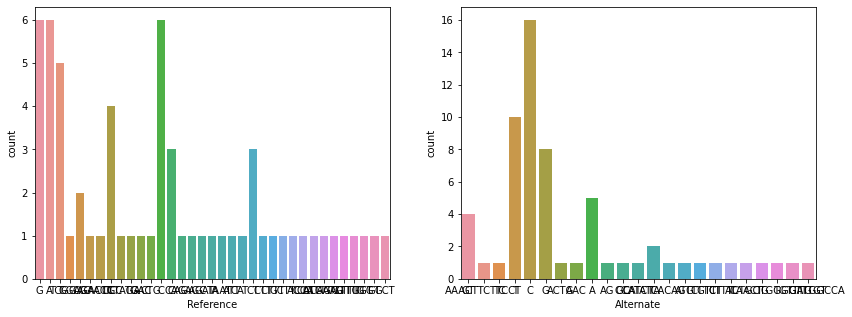

In [14]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(14,5)

sns.countplot(data=CASP8[~(condition1 & condition2)], x="Reference", ax=ax1)
sns.countplot(data=CASP8[~(condition1 & condition2)], x="Alternate", ax=ax2)

In [15]:
CASP8_S = CASP8[condition1 & condition2]
#CASP8_S = CASP8_S['Reference'].str.cat(CASP8_S['Alternate'], sep='>')
CASP8_S['Reference_Alternate'] = CASP8_S[['Reference', 'Alternate']].apply(lambda x: '>'.join(x), axis=1)
CASP8_S

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Chromosome,Position,rsIDs,Reference,Alternate,Source,Filters - exomes,Filters - genomes,Transcript,HGVS Consequence,Protein Consequence,Transcript Consequence,VEP Annotation,ClinVar Clinical Significance,ClinVar Variation ID,Flags,Allele Count,Allele Number,Allele Frequency,Homozygote Count,Hemizygote Count,Allele Count African/African American,Allele Number African/African American,Homozygote Count African/African American,Hemizygote Count African/African American,Allele Count Latino/Admixed American,Allele Number Latino/Admixed American,Homozygote Count Latino/Admixed American,Hemizygote Count Latino/Admixed American,Allele Count Ashkenazi Jewish,Allele Number Ashkenazi Jewish,Homozygote Count Ashkenazi Jewish,Hemizygote Count Ashkenazi Jewish,Allele Count East Asian,Allele Number East Asian,Homozygote Count East Asian,Hemizygote Count East Asian,Allele Count European (Finnish),Allele Number European (Finnish),Homozygote Count European (Finnish),Hemizygote Count European (Finnish),Allele Count European (non-Finnish),Allele Number European (non-Finnish),Homozygote Count European (non-Finnish),Hemizygote Count European (non-Finnish),Allele Count Other,Allele Number Other,Homozygote Count Other,Hemizygote Count Other,Allele Count South Asian,Allele Number South Asian,Homozygote Count South Asian,Hemizygote Count South Asian,Reference_Alternate
2,2,202122909,rs1207061101,T,G,gnomAD Exomes,PASS,NaN,ENST00000358485.4,c.-46T>G,NaN,c.-46T>G,5_prime_UTR_variant,NaN,NaN,NaN,1,248908,0.000004017548652514182,0,0,0,15464,0,0,0,34368,0,0,0,10052,0,0,0,17952,0,0,0,21528,0,0,1,112904,0,0,0,6048,0,0,0,30592,0,0,T>G
3,2,202122910,rs745946856,C,G,gnomAD Exomes,PASS,NaN,ENST00000358485.4,c.-45C>G,NaN,c.-45C>G,5_prime_UTR_variant,NaN,NaN,NaN,3,248546,0.000012070200284856726,0,0,0,15436,0,0,0,34258,0,0,0,10004,0,0,0,17836,0,0,0,21534,0,0,0,112924,0,0,1,6026,0,0,2,30528,0,0,C>G
4,2,202122913,rs1488428251,G,T,gnomAD Exomes,PASS,NaN,ENST00000358485.4,c.-42G>T,NaN,c.-42G>T,5_prime_UTR_variant,NaN,NaN,NaN,1,248940,0.000004017032216598377,0,0,0,15468,0,0,0,34364,0,0,0,10058,0,0,0,17940,0,0,0,21538,0,0,1,112962,0,0,0,6036,0,0,0,30574,0,0,G>T
5,2,202122918,rs909217251,G,C,gnomAD Genomes,NaN,PASS,ENST00000358485.4,c.-37G>C,NaN,c.-37G>C,5_prime_UTR_variant,NaN,NaN,NaN,1,31216,0.00003203485392106612,0,0,0,8654,0,0,0,846,0,0,0,290,0,0,0,1560,0,0,0,3458,0,0,0,15322,0,0,1,1086,0,0,0,0,0,0,G>C
6,2,202122919,rs770297076,C,A,gnomAD Exomes,PASS,NaN,ENST00000358485.4,c.-36C>A,NaN,c.-36C>A,5_prime_UTR_variant,NaN,NaN,NaN,10,249160,0.00004013485310643763,0,0,1,15476,0,0,0,34414,0,0,0,10068,0,0,0,17976,0,0,0,21550,0,0,8,113032,0,0,1,6048,0,0,0,30596,0,0,C>A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,2,202151369,rs34857899,C,T,"gnomAD Exomes,gnomAD Genomes",PASS,PASS,ENST00000358485.4,c.*52C>T,NaN,c.*52C>T,3_prime_UTR_variant,NaN,NaN,NaN,63,244138,0.0002580507745619281,0,0,0,21672,0,0,0,32476,0,0,0,9756,0,0,52,16396,0,0,0,22446,0,0,9,107174,0,0,1,6580,0,0,1,27638,0,0,C>T
756,2,202151373,rs1178318061,C,G,gnomAD Genomes,NaN,PASS,ENST00000358485.4,c.*56C>G,NaN,c.*56C>G,3_prime_UTR_variant,NaN,NaN,NaN,1,31396,0.00003185119123455217,0,0,0,8710,0,0,0,848,0,0,0,290,0,0,0,1560,0,0,0,3470,0,0,1,15432,0,0,0,1086,0,0,0,0,0,0,C>G
757,2,202151377,rs13425113,C,T,gnomAD Genomes,NaN,PASS,ENST00000358485.4,c.*60C>T,NaN,c.*60C>T,3_prime_UTR_variant,Benign/Likely benign,333509,NaN,288,31390,0.009174896463841987,7,0,280,8710,7,0,0,848,0,0,0,290,0,0,0,1560,0,0,0,3472,0,0,5,15426,0,0,3,1084,0,0,0,0,0,0,C>T
758,2,202151378,rs1026363686,G,A,gnomAD Genomes,NaN,PASS,ENST00000358485.4,c.*61G>A,NaN,c.*61G>A,3_prime_UTR_variant,NaN,NaN,NaN,1,31380,0.000031867431485022305,0,0,0,8704,0,0,1,848,0,0,0,290,0,0,0,1558,0,0,0,3474,0,0,0,15420,0,0,0,1086,0,0,0,0,0,0,G>A


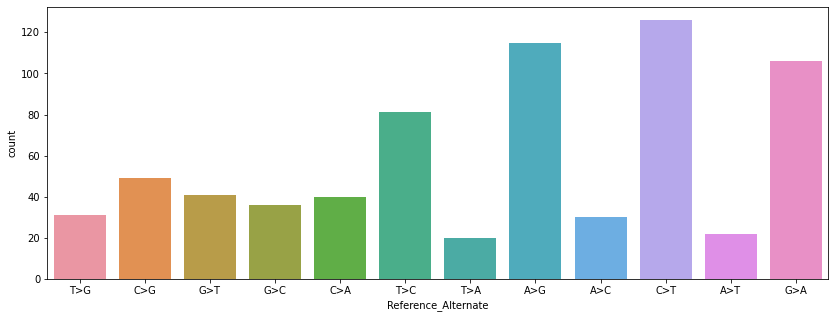

In [16]:
figure, (ax1) = plt.subplots(nrows=1, ncols=1)

figure.set_size_inches(14,5)

sns.countplot(data=CASP8_S, x="Reference_Alternate", ax=ax1)

VEP annotation 분석

In [19]:
variants=list(CASP8['VEP Annotation'])
cnt=0

for r in range (759): #length of variants
  if variants[r] == 'synonymous_variant':
    cnt = cnt+1

num_syn = cnt
print(num_syn)

111


(<Figure size 1008x360 with 1 Axes>,
 ([<matplotlib.patches.Wedge at 0x7f6306cc7690>,
  [Text(0.9859298874572818, 0.4877932523297876, 'Synonymous Variants'),
   Text(-0.9859298874572818, -0.48779325232978754, 'Nonsynonymous Variants')],
  [Text(0.5377799386130627, 0.26606904672533865, '14.62%'),
   Text(-0.5377799386130627, -0.2660690467253386, '85.38%')]))

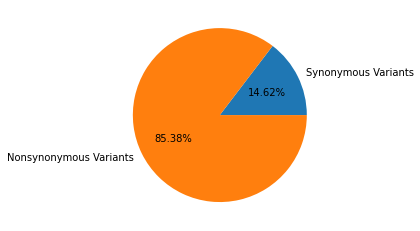

In [18]:
data = [num_syn,(num_samples-num_syn)] # data = [num.of synonymous variants, num. of total variants]

figure, plt.pie(data, labels=['Synonymous Variants', 'Nonsynonymous Variants'], autopct="%.2f%%")

#기타

In [ ]:
for i in range(1303):
  CASP8.iloc[:,[3,4]].head(20)


,3,4
0,Reference,Alternate
1,G,T
2,G,A
3,C,T
4,G,A
5,G,C
6,T,A
7,C,T
8,G,A
9,T,G


In [ ]:
CASP8_RA = CASP8.iloc[:,[3,4]]